In [ ]:
import os

import pandas as pd
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import utils_data

# 1. Upload

In [2]:
DATA_ROOT_P = '../../../data'

DATA_CHUNKS_P = os.path.join(DATA_ROOT_P, 'chunks/6_months_chunk.csv')
DATA_6MONTHS_P = os.path.join(DATA_ROOT_P, 'Пример_выгрузки_6_мес_2024.csv')

## 1.1. Chuncks

In [3]:
# df_from_chunks = utils_data.read_csv_chunks(chunk_path=DATA_CHUNKS_P, n_chunks=2)
# df_from_chunks.to_csv(DATA_6MONTHS_P, index=False)
# df_from_chunks.shape

## 1.2. Months_6 Data

In [4]:
df_6_months = pd.read_csv(DATA_6MONTHS_P)
df_6_months.shape

(87963, 30)

In [5]:
df_6_months.head(5)

,№ заявки,Месяц/год,Неделя,Статус обработки обращений,Статус просрочки,Кластер,Региональный эмитент 2021,Эмитент / ПНПО,Участок,МУ,...,Дата заправки,Время заправки,№ ТРК,Вид НП,Способ оплаты,Баркод,RRN-код,Расшифровка тематики,Карта № 1,Карта № 2
0,77103597,июл.24,27,Закрытое,До 3 дней,Центр,Санкт-Петербург,Санкт-Петербург,Петербургский 1,COPO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Другие вопросы по работе кассира,7.825687e+15,7.825682e+15
1,77103601,июл.24,27,Закрытое,До 3 дней,Центр,Московская область,Московская область,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.825682e+15,NaN
2,77103603,июл.24,27,Закрытое,До 3 дней,Центр,Московская область,Московская область,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.825687e+15,NaN
3,77103604,июл.24,27,Закрытое,До 3 дней,NaN,Невозможно определить,Невозможно определить,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77103605,июл.24,27,Закрытое,До 3 дней,Сибирь,Новосибирск,Новосибирск,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.825686e+15,7.825686e+15


# 2. EDA

## 2.1. Targets

In [6]:
df_6_months.columns

Index(['№ заявки', 'Месяц/год', 'Неделя', 'Статус обработки обращений',
       'Статус просрочки', 'Кластер', 'Региональный эмитент 2021',
       'Эмитент / ПНПО', 'Участок', 'МУ', '№ АЗС', 'Общая тема', 'Тематика',
       'Название скрипта', 'Тип', 'Суть обращения', '№ бонусной карты',
       'Способ поступления', 'Дата/время открытия заявки',
       'Дата/время закрытия заявки', 'Дата заправки', 'Время заправки',
       '№ ТРК', 'Вид НП', 'Способ оплаты', 'Баркод', 'RRN-код',
       'Расшифровка тематики', 'Карта № 1', 'Карта № 2'],
      dtype='object')

In [7]:
# тема, тематика
# ? регион
# адрес АЗС (номер, эмитент/ПНПО)
# номер карты ПЛ
# тип обращения

In [8]:
target_cols_azs = [
    'Региональный эмитент 2021',
    'Эмитент / ПНПО',
    '№ АЗС',
    'Кластер',
    'Участок'
]

In [9]:
# df_6_months[target_cols_azs].head(10)

In [10]:
target_cols_topic = [
    'Общая тема',
    'Тематика',
    'Способ поступления',
    'Расшифровка тематики',
]

In [11]:
# df_6_months[target_cols_topic].head(10)

In [12]:
target_cols_type = [
    'Тип',
]

In [13]:
# df_6_months[target_cols_type].head(10)

In [14]:
target_cols_card = [
    '№ бонусной карты',
    'Карта № 1',
    'Карта № 2',
    'RRN-код',  # ?
    'Баркод',   # ?
]

In [15]:
# df_6_months[target_cols_card].head(10)

In [16]:
known_cols = (
    target_cols_azs
    + target_cols_topic
    + target_cols_type
    + target_cols_card
)

unknown_cols = list(set(df_6_months.columns) - set(known_cols) - {'Суть обращения'})
print(f'Неиспользованные в таргетах колонки ({len(unknown_cols)}):')
unknown_cols

Неиспользованные в таргетах колонки (14):


['Статус просрочки',
 'Дата/время открытия заявки',
 '№ ТРК',
 'Месяц/год',
 'Название скрипта',
 'Дата/время закрытия заявки',
 'Дата заправки',
 'Время заправки',
 'Неделя',
 'Статус обработки обращений',
 '№ заявки',
 'Вид НП',
 'МУ',
 'Способ оплаты']

In [17]:
# потенциально не используемая техническая информация в рамках задачи
cols_tech = [
    '№ заявки',
    'Дата/время открытия заявки',
    'Дата/время закрытия заявки',
    'Статус просрочки',
]

In [18]:
df_6_months[unknown_cols].head(5)

,Статус просрочки,Дата/время открытия заявки,№ ТРК,Месяц/год,Название скрипта,Дата/время закрытия заявки,Дата заправки,Время заправки,Неделя,Статус обработки обращений,№ заявки,Вид НП,МУ,Способ оплаты
0,До 3 дней,2024-07-01 00:00:06,NaN,июл.24,NaN,2024-07-04 13:12:34,NaN,NaN,27,Закрытое,77103597,NaN,COPO,NaN
1,До 3 дней,2024-07-01 00:15:03,NaN,июл.24,NaN,2024-07-03 11:32:56,NaN,NaN,27,Закрытое,77103601,NaN,NaN,NaN
2,До 3 дней,2024-07-01 00:20:04,NaN,июл.24,NaN,2024-07-03 11:34:50,NaN,NaN,27,Закрытое,77103603,NaN,NaN,NaN
3,До 3 дней,2024-07-01 00:25:03,NaN,июл.24,NaN,2024-07-03 11:36:11,NaN,NaN,27,Закрытое,77103604,NaN,NaN,NaN
4,До 3 дней,2024-07-01 00:30:03,NaN,июл.24,NaN,2024-07-03 11:37:35,NaN,NaN,27,Закрытое,77103605,NaN,NaN,NaN


In [19]:
_cols = [
    'Кластер',
    'Участок',
    'МУ'  # ?
]
# df_6_months[_cols].head(10)

## 2.2. Inputs

In [20]:
input_cols = [
    'Суть обращения',
]

In [21]:
df_6_months['Статус обработки обращений'].unique()

array(['Закрытое', 'Открытое повторно', 'Возвращенное', 'В работе',
       'Открытое', 'Отложенное'], dtype=object)

In [22]:
df_6_months['Статус обработки обращений'].unique()

array(['Закрытое', 'Открытое повторно', 'Возвращенное', 'В работе',
       'Открытое', 'Отложенное'], dtype=object)

In [23]:
# закрытое - обработанное обращение
# ? открытое поторно - дубликат обрщения
#   если так, то они нам не нужны, так как в случае дубликата дополняется родительский

# ? возвращенное - недостаточно информации для рассмотрения?
# в работе - обрабатываемое (должно быть без заполненных полей или иметь лишь часть)

# ? открытое - не взятое в работу, до этапа проверки на полноту информации
#   ? или заполненное по полям, но пока висящее на тоработке обращения у проильного специалиста

# ? отложенное - не взятое в работу

In [24]:
df_6_months[['Статус обработки обращений', '№ заявки']].groupby(by='Статус обработки обращений').count()

,№ заявки
Статус обработки обращений,
В работе,124
Возвращенное,145
Закрытое,86322
Открытое,1001
Открытое повторно,370
Отложенное,1


In [25]:
df_6_months[df_6_months['Статус обработки обращений'] == 'Открытое повторно'][target_cols_topic]

,Общая тема,Тематика,Способ поступления,Расшифровка тематики
19,Онлайн Оплата,Оплата кофе,МП,NaN
16100,Программа лояльности,Доначисление бонусов (пластик),E-mail,NaN
18132,Топливо,Количество,МП,NaN
18462,Акции,Предложение для подписчиков «ГазпромБонус»/«Ог...,МП,NaN
18482,Использование ААЗС,Отсутствие пролива,hot-line@gazprom-neft.biz,NaN
...,...,...,...,...
87828,Программа лояльности,Не начислены бонусы ВКЛ (NFC и QR),МП,Нарушений ПЛ нет. Требуется начисление
87855,Программа лояльности,Доначисление бонусов (пластик),E-mail,NaN
87908,Качество обслуживания,Система оплаты,E-mail,Постоплата
87921,Программа лояльности,Доначисление бонусов (пластик),E-mail,NaN


In [26]:
df_6_months.iloc[19][target_cols_topic]

Общая тема              Онлайн Оплата
Тематика                  Оплата кофе
Способ поступления                 МП
Расшифровка тематики              NaN
Name: 19, dtype: object

In [27]:
df_6_months.iloc[19][input_cols[0]]

'\nНапишите ваши пожелания или комментарии о работе наших точек обслуживания или МП «АЗС ГПН». Нам это очень важно.\nНомер заказа:\nКонтактный телефон: 79615278572\nНомер карты ПЛ: 900000810152794, 7825687072030382\nОбъект: \nАдрес: \nПримечание: Сообщение подано с помощью формы обратной связи мобильного приложения «АЗС Газпромнефть»\nДобрый день,еду в другой город,кофе купил большой капучиннно,а тут кофемашина сломана и кофе не дали(((\n--\nОтправлено из Mail.ru для Android'

In [28]:
print(f"all: {df_6_months['№ заявки'].shape[0]}")
print(f"unique: {df_6_months['№ заявки'].unique().shape[0]}")

all: 87963
unique: 87963


In [29]:
target_cols_azs = [
    'Региональный эмитент 2021',
    'Эмитент / ПНПО',
    '№ АЗС',
    'Кластер',
    'Участок'
]

target_cols_topic = [
    'Общая тема',
    'Тематика',
    'Способ поступления',
    'Расшифровка тематики',
]

target_cols_type = [
    'Тип',
]

target_cols_card = [
    '№ бонусной карты',
    'Карта № 1',
    'Карта № 2',
    'RRN-код',  # ?
    'Баркод',   # ?
]

input_cols = [
    'Суть обращения',
]

In [30]:
# df_6_months[df_6_months['Статус обработки обращений'] == 'Закрытое'][target_cols_topic].head(100)

In [31]:
df_6_months['Способ поступления'].unique()

array(['МП', 'gpnbonus.ru', 'E-mail', 'УДЦ',
       'Внутрикорпоративные ресурсы', 'hot-line@gazprom-neft.biz',
       'Книга жалоб', 'PR', 'Управление информационной политики'],
      dtype=object)

## 2.3. Topic

In [32]:
df_6_months[['Общая тема', 'Тематика']].isna().sum()

Общая тема    12
Тематика      14
dtype: int64

In [33]:
mask_closed = df_6_months['Статус обработки обращений'] == 'Закрытое'

In [34]:
closed_topic_none_mask = (
    df_6_months[mask_closed]['Общая тема'].isna()
    * df_6_months[mask_closed]['Тематика'].isna()
)
topic_none_data = df_6_months[mask_closed][closed_topic_none_mask]
topic_none_data.shape

(10, 30)

In [35]:
# print messages
'''
for idx, msg in enumerate(topic_none_data[input_cols[0]].values):
    print(f'({idx})', '==='*20, '\n', '==='*20, '\n', '==='*20, '\n')
    print(msg, '\n', '\n')
''';

In [36]:
# закрытые обращения с топиками и тематиками
topic_exist_data = df_6_months[mask_closed][~closed_topic_none_mask]
topic_exist_data.shape

(86312, 30)

In [37]:
topic_exist_data['Расшифровка тематики'].isna().sum()

np.int64(51481)

In [38]:
print(topic_exist_data['Общая тема'].unique())
topic_exist_data['Общая тема'].unique().shape

['Качество обслуживания' 'Мобильное приложение' 'Программа лояльности'
 'Акции' 'Использование ААЗС' 'ЧаВо' 'Нецелевой звонок' 'Онлайн Оплата'
 'Топливо' 'СТиУ']


(10,)

In [39]:
topic_exist_data['Тематика'].unique().shape

(131,)

In [40]:
topic_exist_data[['Общая тема', 'Тематика']][
    ~topic_exist_data[['Общая тема', 'Тематика']].duplicated()
].shape

(133, 2)

In [41]:
topic_exist_data[['Общая тема', 'Тематика']][
    ~topic_exist_data[['Общая тема', 'Тематика']].duplicated()
].groupby(by='Общая тема').count()

,Тематика
Общая тема,
Акции,16
Использование ААЗС,10
Качество обслуживания,14
Мобильное приложение,11
Нецелевой звонок,15
Онлайн Оплата,10
Программа лояльности,25
СТиУ,7
Топливо,14


In [42]:
# все топики и тематики
topic_exist_data[['Общая тема', 'Тематика']][
    ~topic_exist_data[['Общая тема', 'Тематика']].duplicated()
].sort_values(by='Общая тема');

In [43]:
(
    topic_exist_data[['Общая тема', '№ заявки']]
    .groupby(by='Общая тема')
    .count().reset_index()
    .sort_values(by='№ заявки', ascending=False)
)

,Общая тема,№ заявки
6,Программа лояльности,39081
3,Мобильное приложение,28012
2,Качество обслуживания,3932
0,Акции,3577
5,Онлайн Оплата,3417
4,Нецелевой звонок,3131
9,ЧаВо,1821
1,Использование ААЗС,1510
8,Топливо,1406
7,СТиУ,425


In [44]:
# unique_topics_counts.reset_index().to_csv('unique_topics.csv')

In [45]:
pd.DataFrame.sort_values

<function pandas.core.frame.DataFrame.sort_values(self, by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None'>

In [46]:
# число закрытых заявок по всем темам и тематикам
unique_topics_counts = (
    topic_exist_data[['Общая тема', 'Тематика', '№ заявки']]
    .groupby(by=['Общая тема', 'Тематика'])
    .count()
    .sort_values(by=['№ заявки'], ascending=False)
)

unique_topics_counts.reset_index()

,Общая тема,Тематика,№ заявки
0,Мобильное приложение,Удаление аккаунта,23815
1,Программа лояльности,Не начислены бонусы ВКЛ (NFC и QR),13800
2,Программа лояльности,Доначисление бонусов (пластик),10395
3,Программа лояльности,Управление бонусной картой,5907
4,Программа лояльности,Условия ПЛ,2425
5,Нецелевой звонок,Пустой e-mail,1956
6,Онлайн Оплата,Не смог заправиться через МП,1861
7,Мобильное приложение,Функционал в МП,1520
8,Программа лояльности,Объединение карт,1430
9,Программа лояльности,Виртуальная карта лояльности,1390


In [47]:
(
    topic_exist_data[['Тип', '№ заявки']]
    .groupby(by=['Тип'])
    .count()
    .sort_values(by=['№ заявки'], ascending=False)
)

,№ заявки
Тип,
Консультация,36639
Заявка,29991
Дополнение к тикету,18383
Жалоба,967
Пожелание,201
Благодарность,123


In [48]:
t_ex_rmacc_mask = topic_exist_data['Тематика'] == 'Удаление аккаунта'
topic_exist_data[t_ex_rmacc_mask].shape

(23815, 30)

In [49]:
topic_exist_data[~t_ex_rmacc_mask][target_cols_topic].head(5)

,Общая тема,Тематика,Способ поступления,Расшифровка тематики
0,Качество обслуживания,Работа кассира,МП,Другие вопросы по работе кассира
5,Качество обслуживания,Безналичный расчет,gpnbonus.ru,NaN
6,Программа лояльности,Условия ПЛ/ограничения по начислениям бонусов,МП,NaN
7,Мобильное приложение,Функционал в МП,МП,Транзакции
8,Программа лояльности,Изменение статуса карты ПЛ,МП,NaN


In [50]:
_bin = 2
_step = 10
_cols_to_take = [input_cols[0], 'Общая тема', 'Тематика']
for idx, msg in enumerate(
    topic_exist_data[t_ex_rmacc_mask][_cols_to_take]
    .values[_bin*_step : (_bin+1)*_step]
):
    print(f'({idx + _bin*_step})', '==='*20)
    print(f'Общая тема: {msg[1]}, \nТематика: {msg[2]}')
    print('==='*20, '\n')
    print(msg[0], '\n', '\n')

(20) ============================================================
Общая тема: Мобильное приложение, 
Тематика: Удаление аккаунта

Уважаемая Сеть АЗС «Газпромнефть»!
Я хочу прекратить свое участие в программе лояльности «Нам по пути».
Прошу УДАЛИТЬ АККАУНТ из мобильного приложения и все предоставленные мною данные (номер телефона, e-mail и пр.).
И УДАЛИТЬ все карты программы лояльности c накопленными на них бонусами.

Номер телефона авторизации в МП: 79128259138
Карты лояльности отсутствуют

Отправляя это письмо, Я подтверждаю, что проинформирован и согласен, что после УДАЛЕНИЯ аккаунта в мобильном приложении сети АЗС «Газпромнефть» участие в программе лояльности согласно п 2.10 Правил будет прекращено.
Все данные будут безвозвратно утеряны и восстановлению не подлежат. Неиспользованные бонусы будут аннулированы.

Ссылка на Правила Программы Лояльности «Нам по Пути»
https://gpnbonus.ru/loyalty/program-rules-full


 
 

(21) ============================================================
Об

In [51]:
df_6_months['Название скрипта'].isna().all()

np.True_

In [52]:
df_6_months['МУ'].unique()

array(['COPO', nan, 'COCO', 'DOFO', 'CODO', 'DOCO', 'DORO', 'CORO'],
      dtype=object)

In [53]:
df_6_months['Способ поступления'].unique()

array(['МП', 'gpnbonus.ru', 'E-mail', 'УДЦ',
       'Внутрикорпоративные ресурсы', 'hot-line@gazprom-neft.biz',
       'Книга жалоб', 'PR', 'Управление информационной политики'],
      dtype=object)

In [54]:
df_6_months['Способ поступления'].isna().any()

np.False_

In [55]:
df_6_months['Расшифровка тематики'].isna().sum()

np.int64(52391)

## 2.4. Topics Words Cloud

In [56]:
topic_exist_data['Тип'].unique()

array(['Жалоба', 'Консультация', 'Заявка', 'Дополнение к тикету',
       'Пожелание', 'Благодарность', nan], dtype=object)

In [57]:
topic_exist_data.columns

Index(['№ заявки', 'Месяц/год', 'Неделя', 'Статус обработки обращений',
       'Статус просрочки', 'Кластер', 'Региональный эмитент 2021',
       'Эмитент / ПНПО', 'Участок', 'МУ', '№ АЗС', 'Общая тема', 'Тематика',
       'Название скрипта', 'Тип', 'Суть обращения', '№ бонусной карты',
       'Способ поступления', 'Дата/время открытия заявки',
       'Дата/время закрытия заявки', 'Дата заправки', 'Время заправки',
       '№ ТРК', 'Вид НП', 'Способ оплаты', 'Баркод', 'RRN-код',
       'Расшифровка тематики', 'Карта № 1', 'Карта № 2'],
      dtype='object')

In [58]:
# число закрытых заявок по всем темам и тематикам
unique_topics_counts = (
    topic_exist_data[['Общая тема', 'Тематика', '№ заявки']]
    .groupby(by=['Общая тема', 'Тематика'])
    .count()
    .sort_values(by=['№ заявки'], ascending=False)
)

unique_topics_counts.reset_index()

,Общая тема,Тематика,№ заявки
0,Мобильное приложение,Удаление аккаунта,23815
1,Программа лояльности,Не начислены бонусы ВКЛ (NFC и QR),13800
2,Программа лояльности,Доначисление бонусов (пластик),10395
3,Программа лояльности,Управление бонусной картой,5907
4,Программа лояльности,Условия ПЛ,2425
5,Нецелевой звонок,Пустой e-mail,1956
6,Онлайн Оплата,Не смог заправиться через МП,1861
7,Мобильное приложение,Функционал в МП,1520
8,Программа лояльности,Объединение карт,1430
9,Программа лояльности,Виртуальная карта лояльности,1390


In [59]:
unique_topics_counts.reset_index()[unique_topics_counts.reset_index()['Тематика'] == 'Способ оплаты']

,Общая тема,Тематика,№ заявки
12,Онлайн Оплата,Способ оплаты,1102
41,ЧаВо,Способ оплаты,186


In [60]:
t_mask = topic_exist_data['Тематика'] == 'Условия ПЛ'
topic_exist_data[t_mask].shape

(2425, 30)

In [61]:
topic_exist_data[t_mask]['Суть обращения'].shape

(2425,)

In [62]:
# все топики
t_mask_no_rm = topic_exist_data['Тематика'] != 'Удаление аккаунта'

t_all_words_all_topics = ' '.join(
    [str(x) for x in topic_exist_data[t_mask_no_rm]['Суть обращения']]
).lower()

print(len(t_all_words_all_topics.split(' ')))
len(set(t_all_words_all_topics.split(' ')))

2470313


246297

In [63]:
wordcloud = WordCloud(
    width=800,
    height=800,
    max_words=400,
    prefer_horizontal=1,
).generate(t_all_words_all_topics)

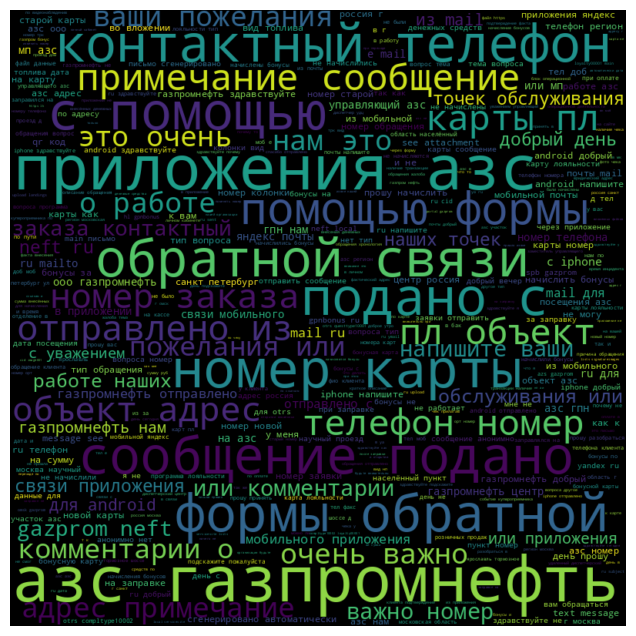

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show();

In [65]:
# конкретный топик
t_all_words_topic = (
    ' '.join([str(x) for x in topic_exist_data[t_mask]['Суть обращения']])
    .lower()
)

print(len(t_all_words_topic.split(' ')))
len(set(t_all_words_topic.split(' ')))

97964


14903

In [66]:
wordcloud = WordCloud(
    width=800,
    height=800,
    max_words=400,
    prefer_horizontal=1,
).generate(t_all_words_all_topics)

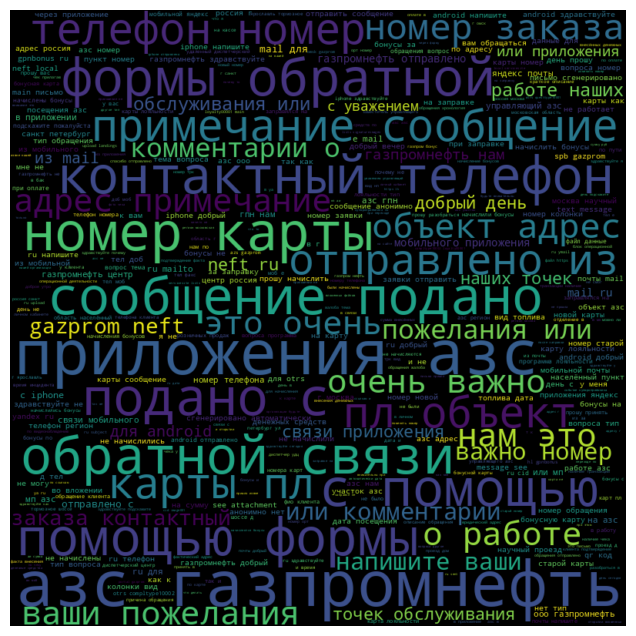

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

plt.show();

In [68]:
# t_mask = topic_exist_data['Тематика'] == 'Управление бонусной картой'

_bin = 7
_step = 10
_cols_to_take = ['Суть обращения', 'Общая тема', 'Тематика']

for idx, msg in enumerate(
    topic_exist_data[t_mask][_cols_to_take]
    .values[_bin*_step : (_bin+1)*_step]
):
    print(f'({idx + _bin*_step})', '==='*20)
    print(f'Общая тема: {msg[1]}, \nТематика: {msg[2]}')
    print('==='*20, '\n')
    print(msg[0], '\n', '\n')

(70) ============================================================
Общая тема: Программа лояльности, 
Тематика: Условия ПЛ

Напишите ваши пожелания или комментарии о работе наших точек обслуживания
или МП «АЗС ГПН». Нам это очень важно.
Номер заказа:

Контактный телефон: 79092915161
Номер карты ПЛ: 7825687074101611
Объект:
Адрес:
Примечание: Сообщение подано с помощью формы обратной связи мобильного
приложения «АЗС Газпромнефть»

 Что даёт статус платина
 
 

(71) ============================================================
Общая тема: Программа лояльности, 
Тематика: Условия ПЛ

Напишите ваши пожелания или комментарии о работе наших точек обслуживания
или приложения АЗС «Газпромнефть». Нам это очень важно.
Номер заказа:

Контактный телефон: 79156502271
Номер карты ПЛ: 7825687048704912
Объект:
Адрес:
Примечание: Сообщение подано с помощью формы обратной связи приложения АЗС
«Газпромнефть»

 Почему заправка 14.08.2024 на 39.44 литра не вошла в статистику за август?
 
 

(72) ============

# 3. Requests Frequency

In [69]:
_ymd_col = 'Дата/время открытия заявки'
df_6_months_freq = df_6_months[[_ymd_col, '№ заявки']].copy()
df_6_months_freq['Год'] = pd.DatetimeIndex(df_6_months_freq[_ymd_col]).year
df_6_months_freq['Месяц'] = pd.DatetimeIndex(df_6_months_freq[_ymd_col]).month

df_6_month_freq_summary = (
    df_6_months_freq
    .groupby(['Год', 'Месяц'])
    .count()
    .reset_index()
    .drop(columns=[_ymd_col])
)

df_6_month_freq_summary

,Год,Месяц,№ заявки
0,2024,7,13187
1,2024,8,13596
2,2024,9,14526
3,2024,10,17260
4,2024,11,15373
5,2024,12,14021


In [70]:
_mean_freq = int(df_6_month_freq_summary['№ заявки'].mean().item())
print(f'mean per month: {_mean_freq}')

mean per month: 14660
